In [296]:
#import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [297]:
#Read the dataset
carprice = pd.read_csv('D:/Upgrad/Linear Regression/CarPrice_Assignment.csv')

In [298]:
# see the data for first few rows
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [299]:
#get the shape
carprice.shape

(205, 26)

In [300]:
#dataset info
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [301]:
#describe the dataset
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [302]:
#Visualize the numerical data
# The data dictionary has provided the categorical and numeric data
# get the numerical columns. We only have numerical columns with data types int64 and float 64 (verified in 
# carprice.info())
carprice_num = carprice.select_dtypes(include=['int64','float64'])

carprice_num.drop(['car_ID'],axis =1,inplace=True)   #dropping car_ID as the values present in that column is jsut an integer
# which is being incremented by 1 for every row.

carprice.drop(['car_ID'],axis=1,inplace=True)


In [303]:
# plt.figure(figsize=(20,15))
# sns.pairplot(carprice_num)
# plt.show()

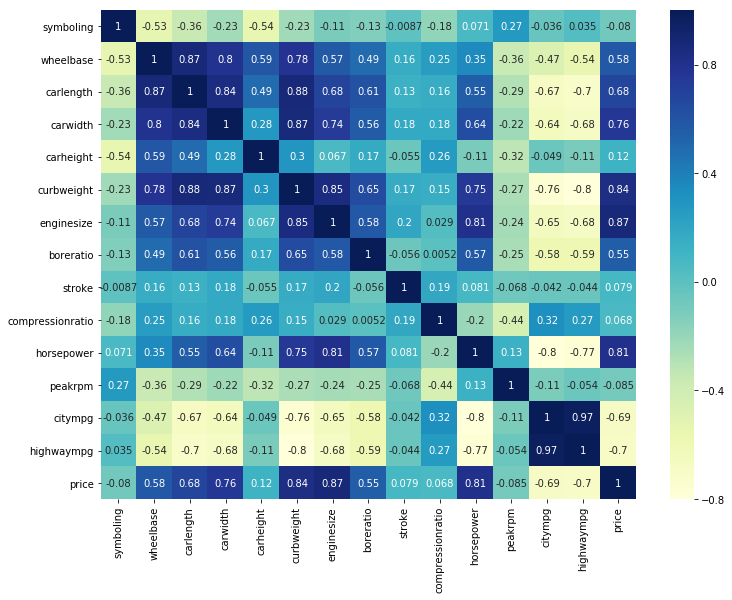

In [304]:
#plotting the heatmap to get the correlation values
plt.figure(figsize=(12, 9))
sns.heatmap(carprice_num.corr(), cmap="YlGnBu", annot = True)

plt.show()


### As seen from the heatmap price is highly corelated in the positive direction with horsepower, enginesize, curbweight, carwidth, carlenght, wheelbase, boreratio
### This implies that there is a positive correlation between the physical dimensions of the car and the price. the bigger these dimensions get, the price of the car would be hgher
### Also, there is a positive corelation between the engine based parameters like horsepower, enginesize and boreratio & the car price.

### Price is negatively correlated with highwaympg and citympg.
### This implies that as the mileage of the car increase, the price reduces.

### One more thing to note here is that the correlaiton between city mileage and highway mileage is 0.97. hence, one of these variable could be dropped for our analysis.

### Also, the curbweight is positively correlated to the physical dimensions  and engine based parameters of the car like wheelbase, carlenght, carwidth, enginesize, bore ratio, horsepower and wheelbase.




In [305]:
#drop highway mileage is it is highly correlated with city mileage
carprice.drop('highwaympg',axis=1,inplace=True)

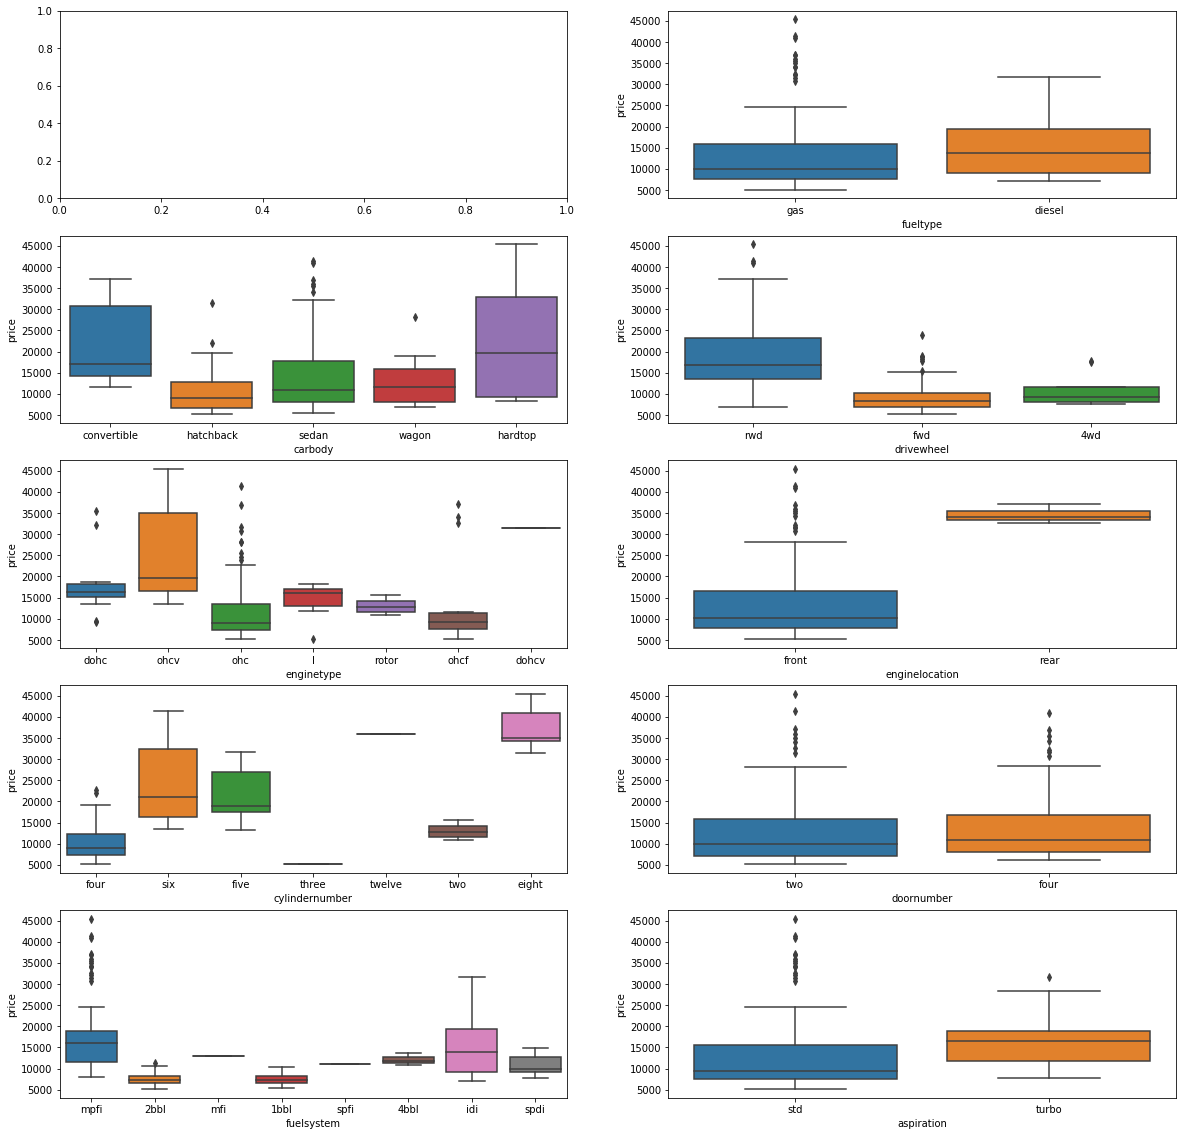

In [306]:
#Categorical Variables
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
# sns.boxplot(x='symboling',y='price',data=carprice)
plt.subplot(5,2,2)
sns.boxplot(x='fueltype',y='price',data=carprice)
plt.subplot(5,2,3)
sns.boxplot(x='carbody',y='price',data=carprice)
plt.subplot(5,2,4)
sns.boxplot(x='drivewheel',y='price',data=carprice)
plt.subplot(5,2,5)
sns.boxplot(x='enginetype',y='price',data=carprice)
plt.subplot(5,2,6)
sns.boxplot(x='enginelocation',y='price',data=carprice)
plt.subplot(5,2,7)
sns.boxplot(x='cylindernumber',y='price',data=carprice)
plt.subplot(5,2,8)
sns.boxplot(x='doornumber',y='price',data=carprice)
plt.subplot(5,2,9)
sns.boxplot(x='fuelsystem',y='price',data=carprice)
plt.subplot(5,2,10)
sns.boxplot(x='aspiration',y='price',data=carprice)
plt.subplot(5,2,10)

In [307]:
#display the value counts for each categorical variable

# print(carprice.symboling.value_counts())
print(carprice.CarName.value_counts())
print(carprice.fueltype.value_counts())
print(carprice.aspiration.value_counts())
print(carprice.doornumber.value_counts())
print(carprice.carbody.value_counts())
print(carprice.drivewheel.value_counts())
print(carprice.enginelocation.value_counts())
print(carprice.enginetype.value_counts())
print(carprice.cylindernumber.value_counts())
print(carprice.fuelsystem.value_counts())

toyota corona                     6
toyota corolla                    6
peugeot 504                       6
subaru dl                         4
mitsubishi mirage g4              3
mitsubishi g4                     3
mazda 626                         3
mitsubishi outlander              3
toyota mark ii                    3
honda civic                       3
honda accord                      2
plymouth fury iii                 2
subaru                            2
audi 100ls                        2
mazda glc                         2
saab 99e                          2
volvo 144ea                       2
isuzu D-Max                       2
bmw x3                            2
saab 99gle                        2
saab 99le                         2
porsche cayenne                   2
volkswagen dasher                 2
peugeot 604sl                     2
honda civic cvcc                  2
bmw 320i                          2
mazda glc deluxe                  2
mazda rx-7 gs               

In [308]:
# add a new column which indicates the car company name
new= carprice['CarName'].str.split(" ",n=1,expand=True)
# print(len(new))
# print(len(carprice))
# print(new)
carprice['Company'] = new[0]

print(carprice.head(2))
print(carprice['Company'].unique())

   symboling              CarName fueltype aspiration doornumber      carbody  \
0          3   alfa-romero giulia      gas        std        two  convertible   
1          3  alfa-romero stelvio      gas        std        two  convertible   

  drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0        rwd          front       88.6      168.8  ...         130   
1        rwd          front       88.6      168.8  ...         130   

   fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  citympg  \
0        mpfi       3.47   2.68              9.0         111    5000       21   
1        mpfi       3.47   2.68              9.0         111    5000       21   

     price      Company  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  

[2 rows x 25 columns]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' '

In [309]:
# replacing values for the below car company names
#maxda --> mazda, Nissan --> nissan, porcshce --> porsche, toyouta --> toyota, vokswagen, vw --> volkswagen

carprice['Company']=carprice['Company'].replace(['maxda','Nissan','porcshce','toyouta','vokswagen','vw'],['mazda','nissan','porsche','toyota','volkswagen','volkswagen'])
print(carprice['Company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [310]:
#drop the car company name
carprice.drop(['CarName'],axis=1,inplace=True)

In [311]:
print(carprice.Company.value_counts())

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64


In [312]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price         

In [313]:
carprice.shape

(205, 24)

In [314]:
carprice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,45400.000000


### For the numerical columns, it is seen that there is not much difference between the mean and the median.

In [315]:
#Prepare the data for modelling
#Categorical variables
#replacing the categorical variables 

carprice.head(2)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero


In [316]:
#for the columns, fueltype and aspiraiton as there are two unique values in each, lets replace the values with'
#  0 and 1

carprice[['fueltype']]= carprice[['fueltype']].apply(lambda x:x.map({'gas':1, 'diesel':0}))
carprice[['aspiration']] = carprice[['aspiration']].apply(lambda x:x.map({'std':1,'turbo':0}))
print(carprice.fueltype.value_counts())
print(carprice.aspiration.value_counts())

1    185
0     20
Name: fueltype, dtype: int64
1    168
0     37
Name: aspiration, dtype: int64


In [317]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,Company
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero


In [318]:
#replace the values in the columns doornumber, cylindernumber by the number
cols = ['doornumber','cylindernumber']
carprice[cols] = carprice[cols].apply(lambda x:x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}))
print(carprice.doornumber.value_counts())
print(carprice.cylindernumber.value_counts())


4    115
2     90
Name: doornumber, dtype: int64
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


In [319]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,Company
0,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero


In [320]:
# replace the remaining categorical variables by dummies
catg_cols = ['carbody','drivewheel','enginelocation','enginetype','fuelsystem','Company']
catg_cols_dumm = pd.get_dummies(carprice[catg_cols],drop_first = True)
catg_cols_dumm.head()


,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [321]:
# append the dummy columns
carprice = pd.concat([carprice,catg_cols_dumm],axis=1)
carprice.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [322]:
# drop the categorical columns 
carprice.drop(catg_cols,axis=1,inplace=True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,1,1,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,0,0,0


In [323]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Company_audi', 'Company_bmw',
       'Company_buick', 'Company_chevrolet', 'Company_dodge', 'Company_honda',
       'Company_isuzu', 'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_porsche', 'Company_renault

In [324]:
#Data modeling

#split into train and test set

import sklearn
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test = train_test_split(carprice,train_size=0.7,test_size = 0.3,random_state = 100)


In [325]:
#Identify the valriables for scaling
carprice_num = carprice.select_dtypes(include=['int64','float64'])
carprice_num.head()
carprice_num = carprice[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']]
carprice_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,17450.0


In [326]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [327]:
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

#rescaling the variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
122,0.6,1,1,4,0.244828,0.426016,0.291667,0.265487,0.272692,4,...,0,0,1,0,0,0,0,0,0,0
125,1.0,1,1,2,0.272414,0.452033,0.666667,0.212389,0.500388,4,...,0,0,0,1,0,0,0,0,0,0
166,0.6,1,1,2,0.272414,0.448780,0.308333,0.424779,0.314973,4,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,2,0.068966,0.450407,0.316667,0.088496,0.411171,4,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1,0,4,0.610345,0.775610,0.575000,0.858407,0.647401,4,...,0,0,0,0,0,0,0,0,0,1


In [328]:
df_train[num_vars].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.068818
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.466890
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.122110
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.314446
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.382131


In [329]:
#dividing the train data set into X and y
y_train = df_train.pop('price')
X_train = df_train

In [330]:
#Building the model using RFE with 10 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [331]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', False, 13),
 ('aspiration', False, 10),
 ('doornumber', False, 43),
 ('wheelbase', False, 18),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('cylindernumber', False, 6),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 3),
 ('compressionratio', False, 2),
 ('horsepower', False, 8),
 ('peakrpm', True, 1),
 ('citympg', False, 21),
 ('carbody_hardtop', False, 24),
 ('carbody_hatchback', False, 23),
 ('carbody_sedan', False, 25),
 ('carbody_wagon', False, 26),
 ('drivewheel_fwd', False, 38),
 ('drivewheel_rwd', False, 42),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 5),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 28),
 ('enginetype_ohcf', False, 27),
 ('enginetype_ohcv', False, 49),
 ('enginetype_rotor', False, 7),
 ('fuelsystem_2bbl', False, 39),
 ('fuelsystem_4bbl', False, 30),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mfi', False, 44

In [332]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'peakrpm',
       'enginelocation_rear', 'enginetype_l', 'fuelsystem_idi', 'Company_bmw',
       'Company_peugeot', 'Company_porsche'],
      dtype='object')

In [333]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'cylindernumber', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'Company_audi',
       'Company_buick', 'Company_chevrolet', 'Company_dodge', 'Company_honda',
       'Company_isuzu', 'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_plymouth',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

In [334]:
X_train_rfe = X_train[col]

In [335]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [336]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [337]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.89e-66
Time:                        06:53:11   Log-Likelihood:                 195.40
No. Observations:                 143   AIC:                            -368.8
Df Residuals:                     132   BIC:                            -336.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2467    

In [338]:
## calclate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
1,curbweight,42.01
0,carwidth,31.99
2,enginesize,19.36
8,Company_peugeot,9.95
5,enginetype_l,9.22
3,peakrpm,4.56
4,enginelocation_rear,1.68
6,fuelsystem_idi,1.64
9,Company_porsche,1.64
7,Company_bmw,1.14


In [339]:
#The p-values for Company_porsche is insignificant. 
X_train_new = X_train_rfe.drop(['Company_porsche'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.98e-67
Time:                        06:53:11   Log-Likelihood:                 193.41
No. Observations:                 143   AIC:                            -366.8
Df Residuals:                     133   BIC:                            -337.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2570    

In [340]:
# calclate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe1.drop(['const'], axis=1)
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,curbweight,40.69
0,carwidth,30.76
2,enginesize,19.20
8,Company_peugeot,9.94
5,enginetype_l,9.22
3,peakrpm,4.54
6,fuelsystem_idi,1.63
4,enginelocation_rear,1.15
7,Company_bmw,1.14


In [341]:
# drop the variable curbweight as it is insignificant
X_train_new = X_train_rfe1.drop(['curbweight'],axis=1)
X_train_rfe1a = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe1a).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.73e-62
Time:                        06:53:11   Log-Likelihood:                 180.02
No. Observations:                 143   AIC:                            -342.0
Df Residuals:                     134   BIC:                            -315.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2569    

In [342]:
# calclate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe1a.drop(['const'], axis=1)
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carwidth,19.71
1,enginesize,10.88
7,Company_peugeot,9.77
4,enginetype_l,9.22
2,peakrpm,4.54
5,fuelsystem_idi,1.61
3,enginelocation_rear,1.14
6,Company_bmw,1.14


In [343]:
#although the variables are significant the VIF values are high. Let's try to drop one of the variables with
# high VIF 
X_train_new = X_train_rfe1a.drop(['carwidth'],axis=1)
X_train_rfe2c = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe2c).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     95.83
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.24e-49
Time:                        06:53:12   Log-Likelihood:                 144.69
No. Observations:                 143   AIC:                            -273.4
Df Residuals:                     135   BIC:                            -249.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1716    

In [344]:
# drop the variable Company_peugeot as it is insignificant
X_train_new = X_train_rfe2c.drop(['Company_peugeot'],axis=1)
X_train_rfe2d = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe2d).fit()
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.99e-50
Time:                        06:53:12   Log-Likelihood:                 144.36
No. Observations:                 143   AIC:                            -274.7
Df Residuals:                     136   BIC:                            -254.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1698    

In [345]:
# drop the variable enginetype_l as it is insignificant
X_train_new = X_train_rfe2d.drop(['enginetype_l'],axis=1)
X_train_rfe2e = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe2e).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.08e-51
Time:                        06:53:12   Log-Likelihood:                 144.12
No. Observations:                 143   AIC:                            -276.2
Df Residuals:                     137   BIC:                            -258.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1673    

In [346]:
# calclate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe2e.drop(['const'], axis=1)
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,enginesize,2.54
1,peakrpm,2.08
3,fuelsystem_idi,1.21
4,Company_bmw,1.13
2,enginelocation_rear,1.03


In [347]:
#residual analysis.

y_train_price = lm.predict(X_train_rfe2e)

In [348]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

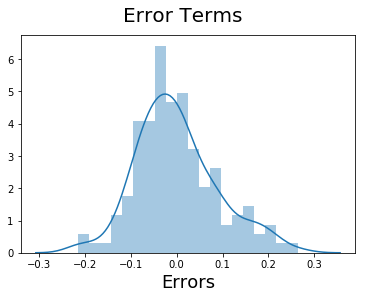

In [349]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [350]:
#The error terms are normally distributed

In [351]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [352]:
#dividng the test dataset into X and y
y_test = df_test.pop('price')
X_test = df_test


In [353]:
X_train_rfe2e.columns

Index(['const', 'enginesize', 'peakrpm', 'enginelocation_rear',
       'fuelsystem_idi', 'Company_bmw'],
      dtype='object')

In [354]:
X_test_rfe = X_test[X_train_rfe2e.columns.drop('const')]


In [355]:
X_test_rfe.columns

Index(['enginesize', 'peakrpm', 'enginelocation_rear', 'fuelsystem_idi',
       'Company_bmw'],
      dtype='object')

In [356]:
X_test_rfe = sm.add_constant(X_test_rfe)
lm = sm.OLS(y_test,X_test_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     74.82
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.57e-23
Time:                        06:53:17   Log-Likelihood:                 66.025
No. Observations:                  62   AIC:                            -120.1
Df Residuals:                      56   BIC:                            -107.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1761    

In [357]:
vif = pd.DataFrame()
X_test_new = X_test_rfe.drop(['const'], axis=1)
vif['Features'] = X_test_new.columns
vif['VIF'] = [variance_inflation_factor(X_test_new.values, i) for i in range(X_test_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.28
1,peakrpm,2.20
2,enginelocation_rear,1.12
3,fuelsystem_idi,1.08
4,Company_bmw,1.08


In [358]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

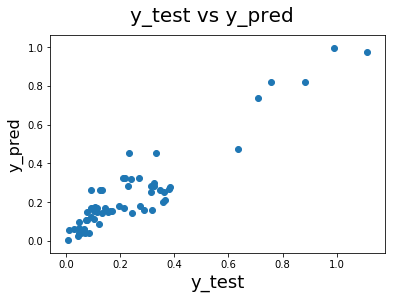

In [359]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [360]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8698004276261881

In [361]:
# the final model contains 5 variables: enginesize, peakrpm, enginelocation_rear, fuelsystem_idi, Company_bmw 
# y test vs y pred is almost linear
# the residual is normal

#R2 on training set: 83.1%, adjusted R2 on training set: 82.5%

#R2 on test set: 87.0%, adjusted R2 on training set: 85.8%


# Equation for training dataset
# y = -0.17 + 1.16 * enginesize + 0.21 * peakrpm  + 0.24 * enginelocation_rear + 
# 0.13 * fuelsystem_idi + 0.23 * Company_bmw 


# Equation for test dataset
# y = -0.17 + 1.23 * enginesize + 0.17 * peakrpm  + 0.25 * enginelocation_rear + 
# 0.07 * fuelsystem_idi + 0.14 * Company_bmw 
    